<a href="https://colab.research.google.com/github/g-roger/LearnDataScience/blob/master/Pycaret_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Classification Module in PyCaret
PyCaret’s classification module (pycaret.classification) is a supervised machine learning module that is used for classifying the elements into a group based on various techniques and algorithms. 

The PyCaret classification module can be used for Binary or Multi-class classification problems. It has over 18 algorithms and 14 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling, or advanced techniques like stacking, PyCaret’s classification module has it all.

* **Getting Data:**  How to import data from PyCaret repository
* **Setting up Environment:**  How to setup an experiment in PyCaret and get started with building classification models
* **Create Model:**  How to create a model, perform cross validation and evaluate classification metrics
* **Tune Model:**  How to automatically tune the hyper-parameters of a classification model
* **Plot Model:**  How to analyze model performance using various plots
* **Finalize Model:** How to finalize the best model at the end of the experiment
* **Predict Model:**  How to make prediction 
* **Save / Load Model:**  How to save / load a model for future use



## Installing PyCaret

Installing on Google Colab, Azure Notebooks or Kaggle

!pip install pycaret

Installing in local Jupyter notebooks

pip install pycaret


## Pre-Requisites

Python 3.6 or higher

PyCaret 2.0 or higher

Stable internet connection to load the data

Basic knowledge of Regression

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv') 

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Preprocessing
1. Drop irrelevant columns (Ticket and PassengerId)
2. Remap Sex column to zeros and ones
3. Check if a passenger had a unique title (like doctor) or had something more generic (like Mr., Miss.) — can be extracted from the Name column
4. Check if cabin information was known — if the value of Cabin column is not NaN
5. Create dummy variables from the Embarked column — 3 options
6. Fill Age values with the simple mean



In [ ]:
data.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
gender_mapper = {'male': 0, 'female': 1}

In [ ]:
data['Sex'].replace(gender_mapper, inplace=True)


In [ ]:
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0])

In [ ]:
data['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in data['Title']]

In [ ]:
data = data.rename(columns={'Title': 'Title_Unusual'}) 
data.drop('Name', axis=1, inplace=True) 


In [ ]:
data['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in data['Cabin']]

In [ ]:
data.drop('Cabin', axis=1, inplace=True) 


In [ ]:
emb_dummies = pd.get_dummies(data['Embarked'], drop_first=True, prefix='Embarked')

In [ ]:
data = pd.concat([data, emb_dummies], axis=1)

In [ ]:
data.drop('Embarked', axis=1, inplace=True) 


In [ ]:
data['Age'] = data['Age'].fillna(int(data['Age'].mean()))

### Importing Libraries

In [ ]:
from pycaret.classification import * 
clf = setup(data, target='Survived', session_id=42)

,Description,Value
0,session_id,42
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 11)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8331,0.8571,0.6882,0.8363,0.7525,0.6287,0.6374,0.108
lr,Logistic Regression,0.8282,0.8512,0.7274,0.7922,0.7575,0.6251,0.6271,0.425
ridge,Ridge Classifier,0.8218,0.0000,0.7275,0.7763,0.7505,0.6123,0.6136,0.014
lda,Linear Discriminant Analysis,0.8186,0.8526,0.7275,0.7696,0.7472,0.6061,0.6074,0.020
lightgbm,Light Gradient Boosting Machine,0.8123,0.8534,0.7060,0.7698,0.7347,0.5902,0.5932,0.079
ada,Ada Boost Classifier,0.8105,0.8395,0.7406,0.7471,0.7427,0.5929,0.5940,0.107
rf,Random Forest Classifier,0.8042,0.8450,0.7100,0.7568,0.7282,0.5761,0.5806,0.502
et,Extra Trees Classifier,0.7834,0.8164,0.6926,0.7167,0.7015,0.5321,0.5348,0.464
dt,Decision Tree Classifier,0.7705,0.7496,0.6837,0.7040,0.6875,0.5072,0.5127,0.016
knn,K Neighbors Classifier,0.7094,0.7080,0.5286,0.6249,0.5681,0.3539,0.3589,0.116


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8291,0.6250,0.7143,0.6667,0.4828,0.4854
1,0.7778,0.8016,0.6957,0.6957,0.6957,0.5207,0.5207
2,0.8571,0.9011,0.7826,0.8182,0.8000,0.6890,0.6894
3,0.9194,0.9287,0.8261,0.9500,0.8837,0.8225,0.8272
4,0.7903,0.8317,0.6522,0.7500,0.6977,0.5384,0.5415
5,0.7581,0.7386,0.5652,0.7222,0.6341,0.4574,0.4651
6,0.8065,0.8595,0.6522,0.7895,0.7143,0.5699,0.5759
7,0.8065,0.8746,0.6957,0.7619,0.7273,0.5778,0.5792
8,0.7903,0.8071,0.6957,0.7273,0.7111,0.5467,0.5470


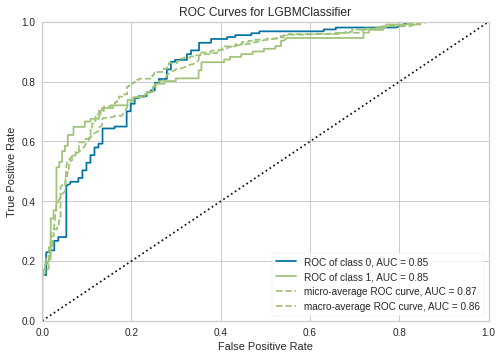

In [ ]:
plot_model(model)

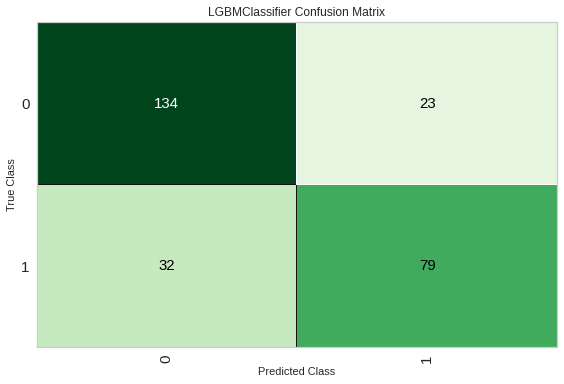

In [ ]:
plot_model(model, 'confusion_matrix')

In [ ]:
predictions = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7948,0.8548,0.7117,0.7745,0.7418,0.572,0.5734


In [ ]:
finalize_model(model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
save_model(model, 'titanic_lgbm')

## Wrap-Up
This notebook has covered the entire machine learning pipeline from data ingestion, pre-processing, training the model, hyperparameter tuning, prediction and saving the model for later use. We have completed all of these steps in less than 10 commands which are naturally constructed and very intuitive to remember such as create_model(), tune_model(), compare_models(). Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code in most libraries